In [143]:
import imageio
import numpy
from matplotlib.pyplot import *

In [144]:
# 1 - Lecture de l'image
img = imread("./image.jpg")

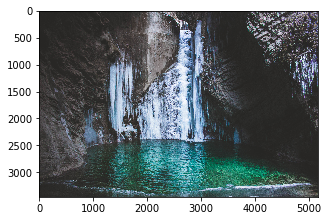

In [145]:
# 2 - Affichage de l'image
figure(figsize=(5,5))
imshow(img);

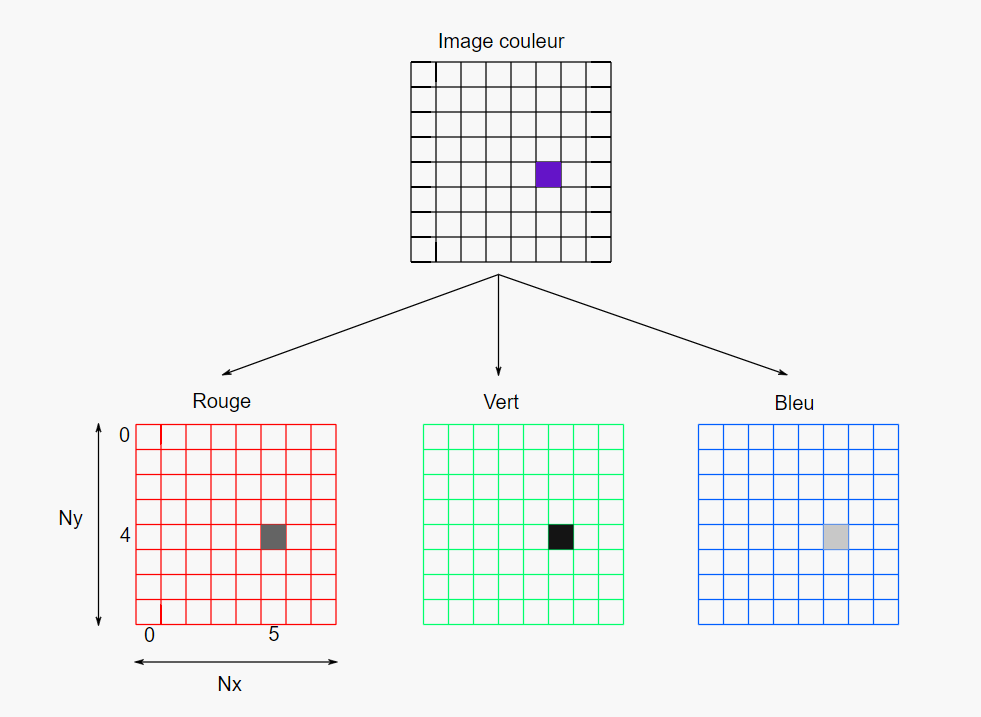

In [146]:
# Separation des couches RGB : 
rouge = img[:,:,0]
vert = img[:,:,1]
bleu = img[:,:,2]

In [147]:
# 3 - Dimensions de l'image :
img.shape

(3456, 5184, 3)

In [148]:
# Type de données 
img.dtype

dtype('uint8')

In [149]:
# 4 - Sauvegarder sous les formats PNG et TIFF
from PIL import Image 
import glob, os
directory = "./"
for infile in glob.glob("*.jpg"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    rgb_im = im.convert('RGB')
    rgb_im.save(directory + file + ".png", "PNG")
    rgb_im.save(directory + file + ".tif", "TIFF")

In [150]:
# 5 - comparaison des dimensions
    # PNG : 
img_png = imread("./image.png")
img_tif = imread("./image.tif")
print('Dimesions de l image PNG : ',img_png.shape)
print('Type de données : ',img_png.dtype)
    # TIFF : 
print('Dimesions de l image tif : ',img_tif.shape)
print('Type de données : ',img_tif.dtype)

Dimesions de l image PNG :  (3456, 5184, 3)
Type de données :  float32
Dimesions de l image tif :  (3456, 5184, 3)
Type de données :  uint8


In [151]:
# 6 - Comparaison des trois formats :
    # Les dimensions de l'image restent les mêmes dans les formats 3456 x 5184 x 3
    # La taille diffère entre les trois images : TIFF >> PNG >> JPEG
def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0


def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)


# Lets check the file size of MS Paint exe 
# or you can use any file path
print('Tailles des trois images : ')
print('JPEG :',file_size('./image.jpg'),' - PNG : ',file_size('./image.png'),' - TIFF : ',file_size('./image.tif'))

Tailles des trois images : 
JPEG : 3.2 MB  - PNG :  21.5 MB  - TIFF :  51.3 MB


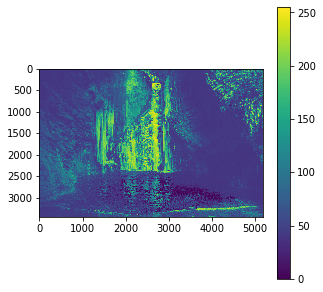

In [152]:
# 7 - Affichage en niveaux de RVB : 
    # Rouge :
figure(figsize=(5,5))
imshow(rouge)
colorbar()

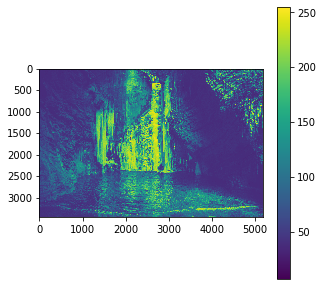

In [153]:
    # Vert : 
figure(figsize=(5,5))
imshow(vert)
colorbar()     

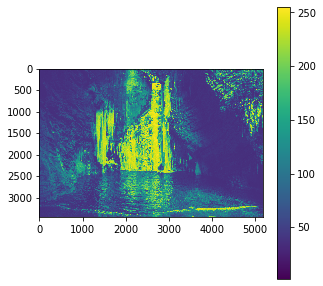

In [154]:
    # Bleu :
figure(figsize=(5,5))
imshow(bleu)
colorbar()

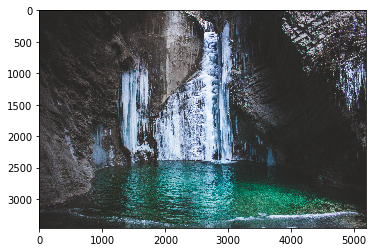

In [155]:
# 8 - reconstruction de l'image initiale à partir des trois niveaux
import numpy as np
rgbArray = np.zeros((3456,5184,3), 'uint8')
rgbArray[..., 0] = rouge
rgbArray[..., 1] = vert
rgbArray[..., 2] = bleu
img_rgb = Image.fromarray(rgbArray)
imshow(img_rgb)

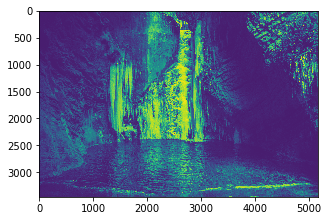

In [156]:
# 9 - Conversion en niveaux de gris
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img_gray = rgb2gray(img)
figure(figsize=(5,5))
imshow(img_gray)

In [157]:
img_gray

array([[40.0669, 40.0669, 40.0669, ..., 42.7644, 46.1231, 60.7796],
       [40.0669, 40.0669, 40.0669, ..., 53.7202, 54.8511, 62.9104],
       [40.0669, 40.0669, 40.0669, ..., 66.6219, 72.8663, 73.9972],
       ...,
       [39.067 , 39.067 , 39.067 , ..., 62.0647, 63.0646, 58.0651],
       [39.067 , 39.067 , 39.067 , ..., 61.0648, 61.0648, 54.0655],
       [39.067 , 39.067 , 39.067 , ..., 53.0656, 53.0656, 44.0665]])

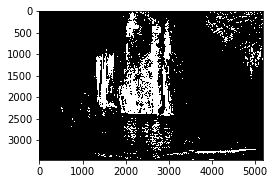

In [158]:
# 10 - Convertion de A en binaire
def seuillage(image,seuil):
    resultat = image.copy()
    s = image.shape
    for j in range(s[0]):
        for i in range(s[1]):
            if image[j,i] > seuil:
                resultat[j,i] = 1
            else:
                resultat[j,i] = 0
    return resultat
# Seuil : pour decider si on prend le pixel blanc ou noir 
# Choix : % qui sera introduit par l'utilisateur, si on choisit 0.5 alors si un pixel possède une valeur de 255/2 au moins 
# Sera paint en blanc alors sinon en noir, nous allons prendre 60% dans ce cas
choix = 0.6
seuil = 255 * choix
im4 = seuillage(img_gray,seuil)
figure(figsize=(4,4))
imshow(im4,cmap='gray',vmin=0,vmax=1)

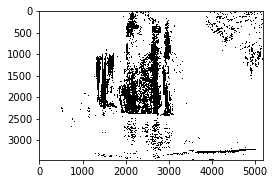

In [159]:
# 11 - Inverse de A et l'afficher :
def Inverse(image):
    resultat = image.copy()
    s = image.shape
    for j in range(s[0]):
        for i in range(s[1]):
            if image[j,i] == 1 :
                resultat[j,i] = 0
            else:
                resultat[j,i] = 1
    return resultat
img_inv = Inverse(im4)
figure(figsize=(4,4))
imshow(img_inv,cmap='gray',vmin=0,vmax=1)

In [160]:
# 12 - Conversion RVB -> HSV et affichage de H,S et V 
img_hsv = matplotlib.colors.rgb_to_hsv(img)

In [161]:
img_hsv[:,:,0]

array([[0.11111111, 0.11111111, 0.11111111, ..., 0.72222227, 0.72222227,
        0.73015875],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.7361111 , 0.74561405,
        0.7395833 ],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.75490195, 0.7692308 ,
        0.8125    ],
       ...,
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111]], dtype=float32)

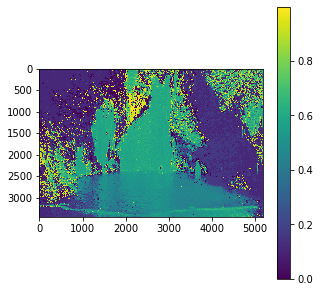

In [162]:
# Rouge
figure(figsize=(5,5))
imshow(img_hsv[:,:,0])
colorbar()

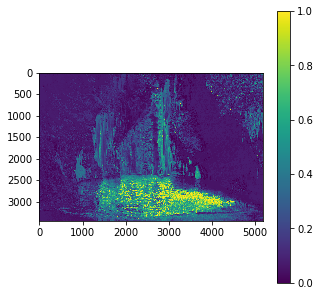

In [163]:
# Vert
figure(figsize=(5,5))
imshow(img_hsv[:,:,1])
colorbar()

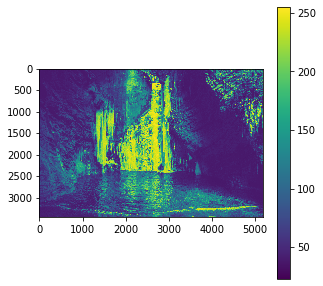

In [164]:
# Bleu
figure(figsize=(5,5))
imshow(img_hsv[:,:,2])
colorbar()

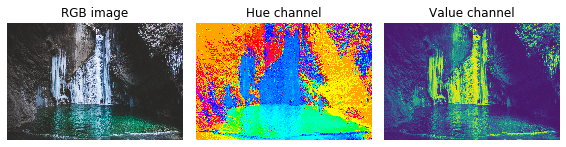

In [165]:
import matplotlib.pyplot as plt
rgb_img = img
hue_img = img_hsv[:, :, 0]
value_img = img_hsv[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()